# Toxicity Detection Model

Get live data with `get_comments.py` and transform Kaggle data set with `transform_train.py`

Get libraries by running `pip install -r requirements.txt`

This is a deep learning model.

In [56]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

from wordcloud import STOPWORDS, wordcloud
import re
from fuzzywuzzy import fuzz, process

from tqdm import tqdm

# Load Dataset

In [ ]:
df_train = pd.read_csv('./data/new_train.csv')
dataset = df_train # Let's use only one.

### Data Cleansing
<ul>
    <li>Removal of special characters</li>
    <li>Expanding contractions</li>
    <li>Lowering text</li>
    <li>Replacing Obfuscated Profane Words</li>
</ul>

In [ ]:
def removeNonPrintable(com):
    com = com.replace('\\r', ' ')
    com = com.replace('\\n', ' ')
    com = com.replace('\\t', ' ')
    com = com.replace('\\"', ' ')
    return com

In [57]:
def getUniqueWords(comments):
    unique_words = set()
    for comment in tqdm(comments):
        words = comment.split(" ")
        for word in words:
            if len(word) > 2:
                unique_words.add(word)
    
    return unique_words

In [58]:
def getProfaneWords():
    profane_words = []
    with open("./data/bad-words.txt","r") as f:
        for word in f:
            word = word.replace("\n","")
            profane_words.append(word)
    return profane_words
    

In [ ]:
def createMappingDict(profane_words, unique_words):
    pass

In [ ]:
def cleanComments(comments):
    processed_comments = []
    for comment in comments:
        comment = removeNonPrintable(comment)

        # Lower comment
        processed_comments.append(comment.lower().strip())
    
    profane_words = getProfaneWords()
    unique_words = getUniqueWords(comments)
    profane_dict = createMappingDict(profane_words, unique_words)

In [55]:
fuzz.ratio("@ction","action")

83

In [59]:
df_train.shape

(38291, 7)

In [5]:
df_train.head()

,Comment,Toxicity,Severe_Toxicity,Identity_Attack,Insult,Profanity,Threat
0,Explanation\nWhy the edits made under my usern...,0.129533,0.005232,0.009843,0.000779,0.000911,0.009409
1,D'aww! He matches this background colour I'm s...,0.022352,0.001590,0.010376,0.001265,0.001273,0.009809
2,"Hey man, I'm really not trying to edit war. It...",0.168278,0.004964,0.010698,0.004839,0.001866,0.009920
3,"""\nMore\nI can't make any real suggestions on ...",0.056532,0.002854,0.009954,0.001283,0.001134,0.009656
4,"You, sir, are my hero. Any chance you remember...",0.022491,0.002081,0.012285,0.004179,0.003558,0.011320


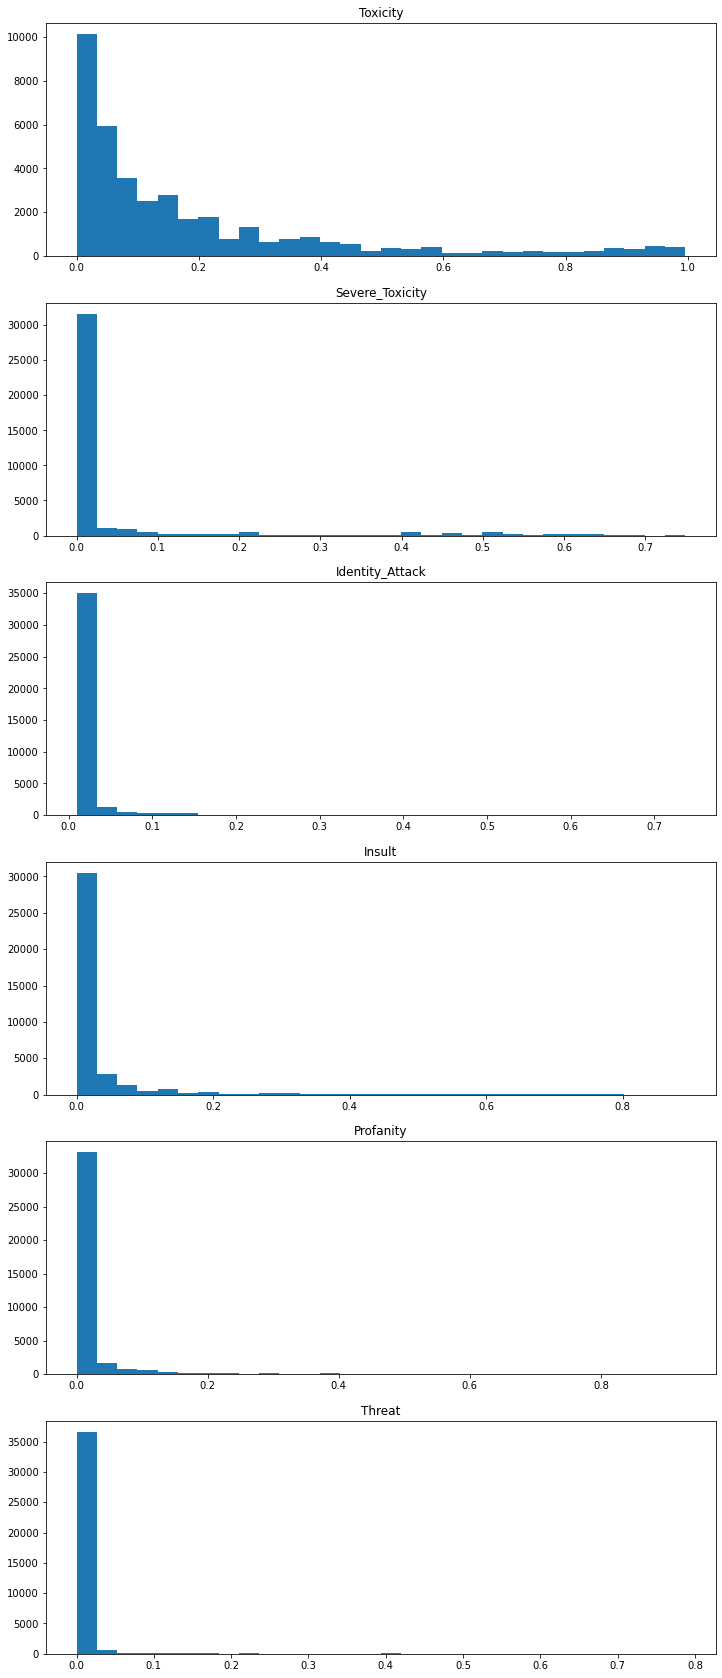

In [50]:
fig, axis = plt.subplots(len(df_train.columns)-1, 1, figsize = (12,30))
for i, col in enumerate(df_train.columns[1:]):
    counts, bins = np.histogram(df_train[col].values, bins = 30)
    axis[i].hist(bins[:-1], bins, weights=counts)
    axis[i].title.set_text(col)
plt.show()

(array([11435.,  8167.,  5131.,  3318.,  2300.,  1528.,  1206.,   890.,
          671.,   543.,   480.,   367.,   267.,   232.,   211.,   156.,
          132.,    98.,   123.,    70.,    74.,    46.,    56.,    56.,
           39.,    35.,    41.,    33.,    28.,    28.,    26.,    30.,
           30.,    32.,    22.,    20.,    28.,    22.,    26.,    23.,
           25.,    20.,    14.,    15.,    26.,    23.,    29.,    34.,
           33.,    52.]),
 array([  14.  ,  113.72,  213.44,  313.16,  412.88,  512.6 ,  612.32,
         712.04,  811.76,  911.48, 1011.2 , 1110.92, 1210.64, 1310.36,
        1410.08, 1509.8 , 1609.52, 1709.24, 1808.96, 1908.68, 2008.4 ,
        2108.12, 2207.84, 2307.56, 2407.28, 2507.  , 2606.72, 2706.44,
        2806.16, 2905.88, 3005.6 , 3105.32, 3205.04, 3304.76, 3404.48,
        3504.2 , 3603.92, 3703.64, 3803.36, 3903.08, 4002.8 , 4102.52,
        4202.24, 4301.96, 4401.68, 4501.4 , 4601.12, 4700.84, 4800.56,
        4900.28, 5000.  ]),
 <a list of 50 Pa

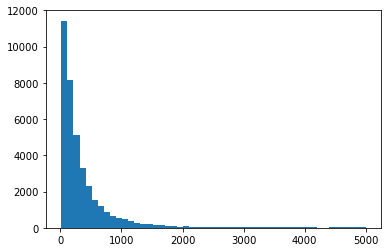

In [41]:
comments_lens = df_train.Comment.str.len()
counts, bins = np.histogram(comments_lens.values, bins = 50)
plt.hist(bins[:-1], bins, weights=counts)

In [46]:
for i in range(11):
    print(f'{i*10}th Percentile Value = {np.percentile(comments_lens, i*10)}')

0th Percentile Value = 14.0
10th Percentile Value = 48.0
20th Percentile Value = 79.0
30th Percentile Value = 114.0
40th Percentile Value = 155.0
50th Percentile Value = 206.0
60th Percentile Value = 274.0
70th Percentile Value = 371.0
80th Percentile Value = 529.0
90th Percentile Value = 885.0
100th Percentile Value = 5000.0


In [47]:
for i in range(11):
    print(f'{90+i}th Percentile Value = {np.percentile(comments_lens, 90 + i)}')

90th Percentile Value = 885.0
91th Percentile Value = 948.0
92th Percentile Value = 1021.0
93th Percentile Value = 1095.0
94th Percentile Value = 1196.0
95th Percentile Value = 1343.5
96th Percentile Value = 1514.0
97th Percentile Value = 1818.0
98th Percentile Value = 2340.199999999997
99th Percentile Value = 3543.0999999999985
100th Percentile Value = 5000.0


# Model Building

Turn dataset into list( list of tokens, scores x 6 ) )

In [ ]:
# Do above

In [ ]:
# Separate dataset into train and test. 9/1
train_dataset = []
test_dataset = []

In [ ]:
BUFFER_SIZE = 1000
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
VOCAB_SIZE = 1000
encoder = layers.TextVectorization(max_tokens = VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
model = keras.Sequential([
	encoder,
	layers.Embedding(
		input_dim = len(encoder.get_vocabulary()),
		output_dim = 64,
		# Use masking to handle the variable sequence lengths
		mask_zero = True
	),
	layers.Bidirectional(layers.LSTM(64)),
	layers.Dense(32, activation='relu'),
	layers.Dense(6)
])

model.compile(loss = keras.losses.BinaryCrossentropy(from_logits = True),
			  optimizer = keras.optimizers.adam_v2.Adam(1e-4),
			  metrics = ['accuracy'])

In [1]:
history = model.fit(train_dataset,
					epochs = 20,
					steps_per_epoch = 50,
					validation_data = test_dataset,
					validation_steps = 30)

NameError: name 'model' is not defined

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)